# Lesson I

## Summarizing Data

### Aggregating Methods

NumPy has several ways to summarize array information:

- .sum()
- .min()
- .max()
- .mean()
- .cumsum()

#### Our Data

Let's imagine we run a data security firm with three large clients.We have a count of data breaches foreach client by year in a NumPy array. Each row of this data represents the security breaches that happened in a given year, and each column represents the breaches that occured for each client.


In [7]:
import numpy as np

# Security breeches array
security_breeches = np.array([[0, 5, 1],
                              [0, 2, 0],
                             [1, 1, 2],
                             [2, 2, 1],
                             [0, 0, 0]])

print("Each row is given year\nEach column is given client")
print(security_breeches)

Each row is given year
Each column is given client
[[0 5 1]
 [0 2 0]
 [1 1 2]
 [2 2 1]
 [0 0 0]]


#### Summing Data

First aggregating method, **.sum()**, adds up all elements in the entire array.

Throughout the five years our firm has been tracking breaches, our three clients have seen 17 total security breaches.


In [8]:
print(security_breeches.sum())

17


We can control which axis to sum across with the **axis** argument. Setting the axis keyword argument equal to **zero** sums the value of all rows in each column, _creating column totals_.

Setting axis equal to **one** will sum the calues of all columns in each row, _creating row totals_.


In [9]:
# Column totals
print("Column Totals:")
print(security_breeches.sum(axis=0))
# Row totals
print("Row Totals:")
print(security_breeches.sum(axis=1))

Column Totals:
[ 3 10  4]
Row Totals:
[6 2 4 5 0]


#### Minimum and Maximum Values

**.min()** and **.max()** find the minimum or maximum of an entire array if no axis argument is set.

We can return the min or max of each column or each row if the axis argument is set to zero or one.


In [10]:
# Min Value of array
print(security_breeches.min())
# Max Value of Array
print(security_breeches.max())
# Min value in columns
print(security_breeches.min(axis=0))
# Min Value in rows
print(security_breeches.min(axis=1))
# Max Value in Columns
print(security_breeches.max(axis=0))
# Max Value in Rows
print(security_breeches.max(axis=1))

0
5
[0 0 0]
[0 0 1 1 0]
[2 5 2]
[5 2 2 2 0]


#### Finding the Mean

**.mean()** operates the same way. The avarage number of security breaches that a client can expect in a year is about _1.13_.

Setting axis argument equal to one finds the mean breaches by year accross all clients. For example, the avarage number of breaches in the first year was _two_.


In [11]:
# Mean of Array
print(security_breeches.mean())
# Mean of a Row
print(security_breeches.mean(axis=1))
# Mean of a Column
print(security_breeches.mean(axis=0))

1.1333333333333333
[2.         0.66666667 1.33333333 1.66666667 0.        ]
[0.6 2.  0.8]


#### The keepdims argument

**.sum(), .min(), .max()**, and **.mean()** all have an optional _keepdims_ keyword argument. If keepdims is set to _True_, then dimensions that are collapsed when aggregating are left in the output array and set to one.

**_This is useful for dimension compatibility!_**


In [12]:
print(security_breeches.sum(axis=1, keepdims=True))

[[6]
 [2]
 [4]
 [5]
 [0]]


#### Cumulative Sums

**.cumsum()** returns the cumulative sum of elements along a given axis. For example, when the axis keyword argument is set to _zero_, **np.cumsum()** returns the number of security breaches a client has ever had up to that year.


In [13]:
security_breeches.cumsum(axis=0)    

array([[ 0,  5,  1],
       [ 0,  7,  1],
       [ 1,  8,  3],
       [ 3, 10,  4],
       [ 3, 10,  4]], dtype=int32)

##### Graphing summary values

Summary information is often best communicated in graphs!

For example, we can graph the cumulative sum of breaches for one client along with the average of the cumulative sums to see how a single client's security breaches over time differ from the mean.


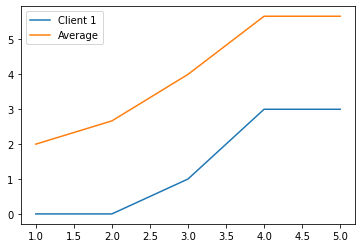

In [14]:
import matplotlib.pyplot as plt

cum_sums_by_client = security_breeches.cumsum(axis=0)

plt.plot(np.arange(1, 6), cum_sums_by_client[:, 0], label="Client 1")
plt.plot(np.arange(1, 6), cum_sums_by_client.mean(axis=1), label="Average")
plt.legend()

plt.show()

## Exercise I

### Sales totals

The dataset you'll be working with during this chapter is one year's sales data by month for three
different industries. Each row in this `monthly_sales` array represents a **month** from January to December. The **first column** has monthly sales data for _liquor stores_, the **second column** has data for _restaurants_, and the **last column** tracks sales for _department stores_.


In [17]:
# Sales data
monthly_sales = np.load('datasets/monthly_sales.npy')

print(monthly_sales)

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]
 [ 4580 25637 10456]
 [ 5109 27995 11299]
 [ 5011 27419 10625]
 [ 5245 27305 10630]
 [ 5270 27760 11550]
 [ 4680 24988  9762]
 [ 4913 25802 10456]
 [ 5312 25405 13401]
 [ 6630 27797 18403]]


Your task is to create an array with all the information from `monthly_sales` as well as a fourth column which totals the monthly sales across industries for each month.


In [22]:
# Create a 2D array of total monthly sales across industries
monthly_industry_sales = monthly_sales.sum(axis=1, keepdims=True)
# print monthly_industry_sales
print(monthly_industry_sales)

# Add this column as the last column in monthly_sales
monthly_sales_with_total = np.concatenate((monthly_sales, monthly_industry_sales), axis=1)
# Print Total
print(monthly_sales_with_total)

[[36716]
 [37133]
 [42515]
 [40673]
 [44403]
 [43055]
 [43180]
 [44580]
 [39430]
 [41171]
 [44118]
 [52830]]
[[ 4134 23925  8657 36716]
 [ 4116 23875  9142 37133]
 [ 4673 27197 10645 42515]
 [ 4580 25637 10456 40673]
 [ 5109 27995 11299 44403]
 [ 5011 27419 10625 43055]
 [ 5245 27305 10630 43180]
 [ 5270 27760 11550 44580]
 [ 4680 24988  9762 39430]
 [ 4913 25802 10456 41171]
 [ 5312 25405 13401 44118]
 [ 6630 27797 18403 52830]]


### Plotting Averages

Perhaps you have a hunch that department stores see greater increased sales than average during the
end of the year as people rush to buy gifts. You'd like to test this theory by comparing monthly
department store sales to average sales across all three industries.


[12238.66666667 12377.66666667 14171.66666667 13557.66666667
 14801.         14351.66666667 14393.33333333 14860.
 13143.33333333 13723.66666667 14706.         17610.        ]


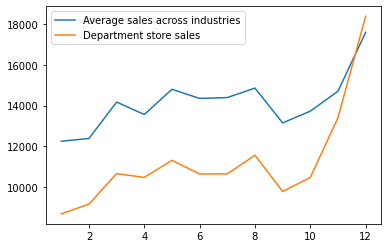

In [25]:
# Create the 1D array avg monthly sales
avg_monthly_sales = monthly_sales.mean(axis=1)
# Print average
print(avg_monthly_sales)

# Plot avg_monthly_sales by month
plt.plot(np.arange(1, 13), avg_monthly_sales, label="Average sales across industries")
# Plot department store sales by month
plt.plot(np.arange(1, 13), monthly_sales[:, 2], label="Department store sales")

plt.legend()
plt.show()

### Cumulative sales

In the last exercise, you established that December is a big month for department stores. Are there
other months where sales increase or decrease significantly?

Your task now is to look at monthly cumulative sales for each industry. The slope of the cumulative
sales line will explain a lot about how steady sales are over time: a straight line will indicate
steady growth, and changes in slope will indicate relative increases or decreases in sales.


[[  4134  23925   8657]
 [  8250  47800  17799]
 [ 12923  74997  28444]
 [ 17503 100634  38900]
 [ 22612 128629  50199]
 [ 27623 156048  60824]
 [ 32868 183353  71454]
 [ 38138 211113  83004]
 [ 42818 236101  92766]
 [ 47731 261903 103222]
 [ 53043 287308 116623]
 [ 59673 315105 135026]]


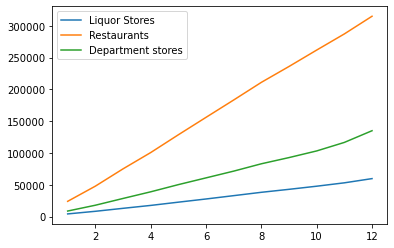

In [28]:
# Find cumulative monthly sales for each industry
cumulative_monthly_industry_sales = monthly_sales.cumsum(axis=0)
# Print Result
print(cumulative_monthly_industry_sales)

# Plot each industry's cumulative sales by month as separate lines
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:, 0], label="Liquor Stores")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:, 1], label="Restaurants")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:, 2], label="Department stores")

plt.legend()
plt.show()

# Lesson II

## Vectorized Operations

When NumPy sums elements in an array. It does not add each element one by one but rather adds all of them together at once. How? Recall NumPy's rule that all elements in an array must be the same data type. Because of this rule, NumPy is able to outsource tasks to C, programming language. Delegating tasks to C is a big reason for NumPy's own efficiency!

Employing the help of optimized C code this way is knows as **vectorization**. This all occurs without the user having to prompt NumPy to vectorize.

For example, the `.sum()` method uses C under the hood to sum quickly and efficiently.


In [29]:
np.arange(100000).sum()

704982704

### Speed Compared to Python

It depends on the task, but the time that NumPy takes to perform a task can be anywhere from ten to a hundred times faster. Plus, using vectorized operations greatly reduces the amount of code we have to write!

For example, using Python to add the number three to each element in an array requires writing a for loop. It's a lot of code for an uncomplicated task, and for loops are slow by their very nature.


In [31]:
# Adding number three using Python is slow!
array = np.array([[1, 2, 3], [4, 5, 6]])
for row in range(array.shape[0]):
    for column in range(array.shape[1]):
        array[row][column] += 3
        
print(array)        

[[4 5 6]
 [7 8 9]]


### NumPy syntax

In NumPy, the syntax is more efficent: we use a _plus(+)_ sign and tell NumPy which single number we'd like to add to all array elements.

In mathematics, a single number is often referred to as a **scalar**. NumPy uses this vocabulary as well: we've just added a scalar, three, to each element in our array, leveraging the power of C.


In [32]:
array = np.array([[1, 2, 3], [4, 5, 6]])
print(array + 3)

[[4 5 6]
 [7 8 9]]


#### Multiplying by a scalar

We can use similar syntax to multiply an array by a scalar.


In [33]:
array = np.array([[1, 2, 3], [4, 5, 6]])
print(array * 3)

[[ 3  6  9]
 [12 15 18]]


#### Adding two arrays together

We can also use vectorized operations between arrays of the same shape. Here, when we add two arrays of the same shape together, NumPy will add each element in the first array to the element at the same location in the second array.


In [34]:
array_a = np.array([[1, 2, 3], [4, 5, 6]])
array_b = np.array([[0, 1, 0], [1, 0, 1]])

print(array_a + array_b)

[[1 3 3]
 [5 5 7]]


#### Multiplying two arrays together

The same principle holds true for multiplying two arrays together, as well as substracting and dividing operations: the operation will be performed between elements at corresponding locations in each array.


In [35]:
print(array_a * array_b)

[[0 2 0]
 [4 0 6]]


### Not Just for Math

While vectorized operations work extremely well with math and numbers, they are leveraged throughout NumPy: we used them to create Boolean masks and filter arrays back in the last chapter!

Here's a Boolean mask indicating where array elements are greater than two, filtered using vectorized syntax.


In [36]:
array = np.array([[1, 2, 3], [4, 5, 6]])
print(array > 2)

[[False False  True]
 [ True  True  True]]


#### Vectorize Python Code!

We can even create out own vectorized functions from Python functions using `np.vectorize()`.

For example, let's check whether each string element in an array has a _length greater than two_. We might expect the NumPy vectorized syntax for this to check whether the len of each element in the array is greater than two. But this doesn't work; instead, the code returns **True**, because the array has more than two elements.


In [37]:
array = np.array(["NumPy", "is", "awesome"])
len(array) > 2

True

The reason our code behaved this way is that **_len is a Python function, not a NumPy function_**, so it can't vectorize.

By feeding len without its trailing parentheses to `np.vectorize()`, we can convert it into a vectorized NumPy function! Then, passing the array as an argument yields the results we hoped for.


In [38]:
vectorized_len = np.vectorize(len)

print(vectorized_len(array) > 2)

[ True False  True]


## Exercise II

### Tax calculations

It's possible to use vectorized operations to calculate taxes for the _liquor_, _restaurant_, and
_department store_ industries! We'll simplify the tax calculation process here and assume that
government collects **5%** of all sales across these industries as tax revenue.

Your task is to calculate the tax owed by each industry related to each month's sales.


In [40]:
# Create an array of tax collected by industry and month
tax_collected = monthly_sales * 0.05
# Print result
print(tax_collected)

# Create an array of sales revenue plus tax collected by industry and month
total_tax_and_revenue = monthly_sales + tax_collected
# Print Result
print(total_tax_and_revenue)

[[ 206.7  1196.25  432.85]
 [ 205.8  1193.75  457.1 ]
 [ 233.65 1359.85  532.25]
 [ 229.   1281.85  522.8 ]
 [ 255.45 1399.75  564.95]
 [ 250.55 1370.95  531.25]
 [ 262.25 1365.25  531.5 ]
 [ 263.5  1388.    577.5 ]
 [ 234.   1249.4   488.1 ]
 [ 245.65 1290.1   522.8 ]
 [ 265.6  1270.25  670.05]
 [ 331.5  1389.85  920.15]]
[[ 4340.7  25121.25  9089.85]
 [ 4321.8  25068.75  9599.1 ]
 [ 4906.65 28556.85 11177.25]
 [ 4809.   26918.85 10978.8 ]
 [ 5364.45 29394.75 11863.95]
 [ 5261.55 28789.95 11156.25]
 [ 5507.25 28670.25 11161.5 ]
 [ 5533.5  29148.   12127.5 ]
 [ 4914.   26237.4  10250.1 ]
 [ 5158.65 27092.1  10978.8 ]
 [ 5577.6  26675.25 14071.05]
 [ 6961.5  29186.85 19323.15]]


### Projecting sales

You'd like to be able to plan for next year's operations by projecting what sales will be, and
you've gathered multipliers specific to each month and industry. These multipliers are saved in an
array called `monthly_industry_multipliers`. For example, the multiplier at
`monthly_industry_multipliers[0, 0]` of `0.98` means that the liquor store industry is projected to have 98% of this January's sales in January of next year.


[[ 4051.32 24403.5   8657.  ]
 [ 4116.   24113.75  8867.74]
 [ 4953.38 28012.91 10432.1 ]
 [ 4946.4  25893.37 10246.88]
 [ 5517.72 27435.1  11073.02]
 [ 5512.1  27144.81 10518.75]
 [ 5874.4  27578.05 10630.  ]
 [ 5797.   28315.2  11550.  ]
 [ 5194.8  25237.88  9859.62]
 [ 5306.04 25543.98 10142.32]
 [ 5790.08 25405.   13669.02]
 [ 7491.9  28630.91 18771.06]]


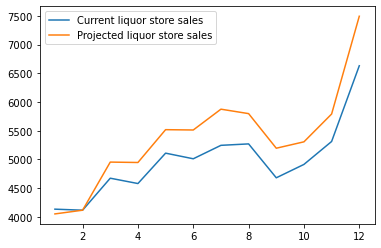

In [44]:
# Monthly multipliers
monthly_industry_multipliers = np.array([[0.98, 1.02, 1.  ],
                                         [1.00, 1.01, 0.97],
                                         [1.06, 1.03, 0.98],
                                         [1.08, 1.01, 0.98],
                                         [1.08, 0.98, 0.98],
                                         [1.1 , 0.99, 0.99],
                                         [1.12, 1.01, 1.  ],
                                         [1.1 , 1.02, 1.  ],
                                         [1.11, 1.01, 1.01],
                                         [1.08, 0.99, 0.97],
                                         [1.09, 1.  , 1.02],
                                         [1.13, 1.03, 1.02]])

# Create an array of monthly projected sales for all industries
projected_monthly_sales = monthly_sales * monthly_industry_multipliers
# Print result
print(projected_monthly_sales)

# Grapgh current liquor store sales and projected liquor store sales by month
plt.plot(np.arange(1, 13), monthly_sales[:, 0], label="Current liquor store sales")
plt.plot(np.arange(1, 13), projected_monthly_sales[:, 0], label="Projected liquor store sales")

plt.legend()
plt.show()

### Vectorizing.upper()

There are many situations where you might want to use Python methods and functions on array elements 
in NumPy. You can always write a ```for``` loop to do this, but vectorized operations are much faster and more efficient, so consider using ```np.vectorize()```!

* We got array called ```names``` which contains first and last names:

In [45]:
names = np.array([["Izzy", "Monica", "Marvin"],
                  ["Weber", "Patel", "Hernandez"]])

You'd like to use one of the Python methods you learned on DataCamp, ```.upper()```, to make all the 
letters of every name in the array uppercase. As a reminder, ```.upper()``` is a *string method*, meaning that it must be called on an instance of a string: ```str.upper()```.

Your task is to vectorize this Python method. 

In [46]:
# Vectorize the .upper() string method
vectorized_upper = np.vectorize(str.upper)

# Apply vectorized_upper to names array
uppercase_names = vectorized_upper(names)
# Print result
print(uppercase_names)

[['IZZY' 'MONICA' 'MARVIN']
 ['WEBER' 'PATEL' 'HERNANDEZ']]


# Lesson III

## Broadcasting

Broadcasting takes vectorized operations to the next level!

Previously, we covered vectorized operations between arrays of the same size or between an array and a scalar. It's also possible to perform mathematical operations between arrays of different shapes. Since this involves **"broadcasting"**, or stretching the smallar array across the larger one, the conventions that govern this type of array math are called **"broadcasting"**.

In fact, adding a scalar to an array uses broadcasting. Here, the scalar two that we add to each element in the array is broadcast across the array so that the result is the same as though the array had been added to an array full of twos.

### Compatibility rules

Broadcasting only works with compatible arrays.

* NumPy compares sets of array dimensions from right to left

```python
shape(10, 5) # Right value is 5
shape(10, 1) # Right value is 1
```
---
* Two dimensions are compatible when...
    - One of them has alength of one or
    - They are of equal lengths  
* All dimension sets must be compatible

### Broadcastable or not?

| Broadcastable shapes | Shapes which are not broadcastable |
| --------------------:|-----------------------------------:|
| ```(10, 5)``` and ```(10, 1)``` | ```(10, 5)``` and ```(5, 10)``` |
| ```(10, 5)``` and ```(5, )``` | ```(10, 5)``` and ```(10, )``` |

## Broadcasting rows

Let's add an array holding the numbers *zero through four* to a **2D** array holding the numbers *zero through nine* with *two rows and five columns*. These arrays are broadcastable because both have a trailing dimension of five.

In [47]:
array = np.arange(10).reshape((2, 5))
print(array + np.array([0, 1, 2, 3, 4]))

[[ 0  2  4  6  8]
 [ 5  7  9 11 13]]


NumPy broadcasts the 1D array by operating as though there is a copy of the 1D array for each row in the 2D array, then adding the two together.

### Incompatible broadcasting

NumPy's default assumption is that the user is attempting to broadcast **row-wise**, as we saw in the previous example. Thus, a 1D array of *two elements* is **not** broadcastable across an array with *two rows and five columns*, because the right-most dimension of each array is **not** the same.

In [48]:
array = np.arange(10).reshape((2, 5))
print(array + np.array([0, 1]))

ValueError: operands could not be broadcast together with shapes (2,5) (2,) 

## Broadcasting Columns

We can broadcast an array of two elements across an array with two rows by changing its shape using ```.reshape()``` so that the trailing dimensions are compatible. Now, the array to be stretched has two rows and one column. Since a trailing dimension of one is compatible with any other trailing dimension, the arrays are broadcastable together.

In [50]:
array = np.arange(10).reshape((2, 5))
print(array + np.array([0, 1]).reshape((2, 1)))

[[ 0  1  2  3  4]
 [ 6  7  8  9 10]]


Again, the math is performed as though the single-column array has been stretched across an array of the same shape as the larger array. NumPy has done this without actually creating the stretched array; the benefits of broadcasting grow with the size of the data we work with!

### Other Operators

The same logic applies to multiplying and substracting!

## Exercise III

### Broadcasting across columns

Recall that when broadcasting across columns, NumPy requires you to be explicit that it should 
broadcast a vertical array, and horizontal and vertical 1D arrays do not exist in NumPy. Instead, 
you must first create a 2D array to declare that you have vertical data. Then, NumPy creates a copy 
of this 2D vertical array for each column and applies the desired operation.

A Python list called ```monthly_growth_rate``` with ```len()``` of **12** is available. This list represents monthly year-over-year expected growth for the economy; your task is to use broadcasting to multiply this list by each column in the ```monthly_sales``` array. 


In [58]:
monthly_growth_rate = list(range(12))   

# Convert montly_growth_rate into a NumPy array
monthly_growth_1D = np.array(monthly_growth_rate)
# Reshape monthly_growth_1D
monthly_growth_2D = monthly_growth_1D.reshape((12, 1))
# Multipyly each column in monthly sales by monthly_growth_2D
print(monthly_sales * monthly_growth_2D)

[[     0      0      0]
 [  4116  23875   9142]
 [  9346  54394  21290]
 [ 13740  76911  31368]
 [ 20436 111980  45196]
 [ 25055 137095  53125]
 [ 31470 163830  63780]
 [ 36890 194320  80850]
 [ 37440 199904  78096]
 [ 44217 232218  94104]
 [ 53120 254050 134010]
 [ 72930 305767 202433]]


### Broadcasting across rows

In the last set of exercises, you used ```monthly_industry_multipliers```, to create sales predictions. Recall that ```monthly_industry_multipliers``` looks like this:

In [59]:
monthly_industry_multipliers

array([[0.98, 1.02, 1.  ],
       [1.  , 1.01, 0.97],
       [1.06, 1.03, 0.98],
       [1.08, 1.01, 0.98],
       [1.08, 0.98, 0.98],
       [1.1 , 0.99, 0.99],
       [1.12, 1.01, 1.  ],
       [1.1 , 1.02, 1.  ],
       [1.11, 1.01, 1.01],
       [1.08, 0.99, 0.97],
       [1.09, 1.  , 1.02],
       [1.13, 1.03, 1.02]])

Assume you're not comfortable being so specific with your estimates. Rather, you'd like to use 
```monthly_industry_multipliers``` to find a single average multiplier for each industry. Then 
you'll use that multiplier to project next year's sales.

In [64]:
# Find the mean sales projection multiplier for each industry
mean_multipliers = monthly_industry_multipliers.mean(axis=0)
# Print Result
print(mean_multipliers)

# Print the shapes of mean multipliers and monthly sales
print(mean_multipliers.shape, monthly_sales.shape)

# Multiply each value by the multiplier for that industry
projected_sales = mean_multipliers * monthly_sales
# Print Result
print(projected_sales)

[1.0775     1.00833333 0.99333333]
(3,) (12, 3)
[[ 4454.385      24124.375       8599.28666667]
 [ 4434.99       24073.95833333  9081.05333333]
 [ 5035.1575     27423.64166667 10574.03333333]
 [ 4934.95       25850.64166667 10386.29333333]
 [ 5504.9475     28228.29166667 11223.67333333]
 [ 5399.3525     27647.49166667 10554.16666667]
 [ 5651.4875     27532.54166667 10559.13333333]
 [ 5678.425      27991.33333333 11473.        ]
 [ 5042.7        25196.23333333  9696.92      ]
 [ 5293.7575     26017.01666667 10386.29333333]
 [ 5723.68       25616.70833333 13311.66      ]
 [ 7143.825      28028.64166667 18280.31333333]]
